In [1]:
from framework import FrameWork
#from framework import AveragedPerdiction
#from framework import BorexinoRecoilSpectrum
#from framework import SuperkTotalEventPrediction

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


In [2]:

frame            = FrameWork()

#np.ones((self.total_days,1))*survival_probablity[np.newaxis,:]


#frame.norm['B8'] = [5.25e-4] #cm^-2 s^-1 10^10 from SNO

#dr_dldt          = frame[[34.4,0]] ##theta_12 from SuperK bestfit



In [7]:
su_pr = 0.4*np.ones(155)

total_days = frame.total_days
su_pr = np.ones((total_days,1))*su_pr[np.newaxis,:]

total_event          = frame[su_pr,0]

[14.54620807 14.55401132 14.56182654 ... 14.3316632  14.32684766
 14.32210799]


[29.65099295]


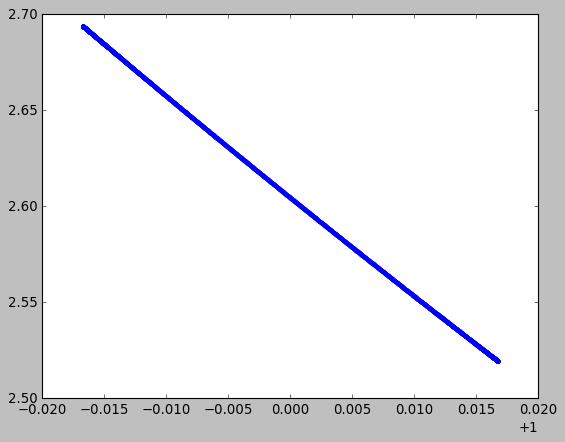

In [8]:
plt.plot(frame.distance,total_event,'.')
print(frame.borom_unoscilated_total)
#plt.plot(frame.distance,(32.5/365.25)*frame.borom_unoscilated_total,'.')

11.65312162312782


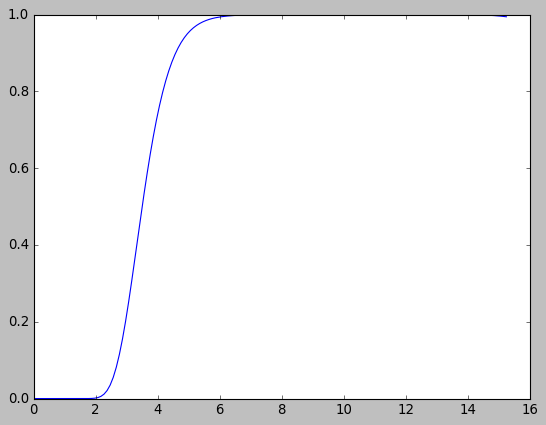

In [15]:
print(np.trapz(frame.resp_func[0],frame.energy_recoil))
plt.plot(frame.energy_recoil,frame.resp_func[0])

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5]


In [7]:
b8spec = np.loadtxt('./Spectrum/B8_spectrum.txt')

In [8]:
print(b8spec.shape)

(155, 2)
